In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
df = pd.read_pickle('dataset_sentimens.pckl')

In [3]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [4]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [5]:
stop_words_german = list()
with open('stopp_wörter_deutsch.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split(','):
   
            # displaying the words           
            stop_words_german.append(word.replace(' ',''))

In [6]:
X = df[cluster_variables].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
len(df['text'].unique())

5751

In [8]:
df['text'] = df['text'].str.replace('\n',' ')
corpus = df['text']
vectorizer = TfidfVectorizer(stop_words=stop_words_german)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


X = X.toarray() 

C:\Users\tikac\anaconda3\envs\dc\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auãÿen', 'auãÿer', 'auãÿerdem', 'auãÿerhalb', 'chlich', 'chste', 'darã¼ber', 'darã¼berhinaus', 'daãÿ', 'dã¼rfte', 'dã¼rften', 'dã¼rftest', 'dã¼rftet', 'fã¼r', 'gegenã¼ber', 'gemã', 'grã¼ndlich', 'hrend', 'hã', 'kã', 'muãÿ', 'muãÿt', 'mã¼ssen', 'mã¼ãÿt', 'nnen', 'nnt', 'nnte', 'nnten', 'nntest', 'nntet', 'nã', 'tatsã', 'ufig', 'vorã¼ber', 'wã', 'wã¼rde', 'wã¼rden', 'wã¼rdest', 'wã¼rdet', 'zwischen', 'ã¼ber', 'ã¼berall', 'ãÿ'] not in stop_words.
  warnings.warn(
C:\Users\tikac\anaconda3\envs\dc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
distortions_euclidean = []
distortions_minkowski = []
distortions_cityblock = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'minkowski'), axis=1)) / X.shape[0])
    distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cityblock'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print(k)


1
2
3
4
5
6
7
8
9


In [10]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 0.993218072679704
2 : 0.9909937920589144
3 : 0.9857477490519062
4 : 0.9888361788997936
5 : 0.9838256356502728
6 : 0.9828168999767297
7 : 0.9818263950551956
8 : 0.9809797256821041
9 : 0.9802527008213172


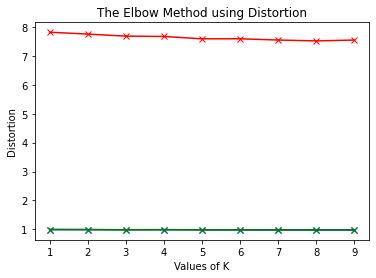

In [11]:
K = range(1,10)
plt.plot(K, distortions_euclidean, 'bx-')
plt.plot(K, distortions_minkowski, 'gx-')
plt.plot(K, distortions_cityblock, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [12]:
for key, val in mapping2.items():
   print(f'{key} : {val}')

1 : 5679.3089330335215
2 : 5654.170615580373
3 : 5614.491150717402
4 : 5629.632215709083
5 : 5592.637897438824
6 : 5581.408503861807
7 : 5570.206697645719
8 : 5560.726359935453
9 : 5552.57915830919


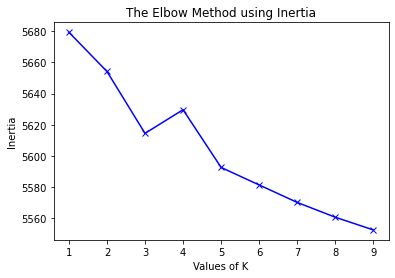

In [13]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [ ]:
cluster_centers[0]

In [ ]:
np.bincount(kmeans.labels_)

In [ ]:
df['kmeans_label'] = kmeans.labels_

In [ ]:
df['neun_euro_context'] = df['neun_euro_context']
df.groupby('kmeans_label').mean().T

https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8

In [ ]:
df['text'] = df['text'].str.replace('\n',' ')

In [ ]:
df[df['kmeans_label']==2]

In [ ]:
list(df[df['kmeans_label']==1]['text'])